In [ ]:
# First Request: Load and inspect dataset


# The CSV file contains some special characters that are not standard UTF-8 (like accented letters)
# To make sure pandas can read all rows without errors we use encoding='latin1'
# This allows us to load the data safely for preprocessing and modeling

import pandas as pd

# Load dataset
file_path = r'C:/Users/LENOVO/Desktop/LinkPlus/AI Challenge/Articles.csv'
df = pd.read_csv(file_path, encoding='latin1')

# Inspect the dataset
print("Dataset shape:", df.shape)
print(df.head())
print("\nCategories distribution:")
print(df['NewsType'].value_counts())

Dataset shape: (2692, 4)
                                             Article      Date  \
0  KARACHI: The Sindh government has decided to b...  1/1/2015   
1  HONG KONG: Asian markets started 2015 on an up...  1/2/2015   
2  HONG KONG:  Hong Kong shares opened 0.66 perce...  1/5/2015   
3  HONG KONG: Asian markets tumbled Tuesday follo...  1/6/2015   
4  NEW YORK: US oil prices Monday slipped below $...  1/6/2015   

                                             Heading  NewsType  
0  sindh govt decides to cut public transport far...  business  
1                    asia stocks up in new year trad  business  
2           hong kong stocks open 0.66 percent lower  business  
3             asian stocks sink euro near nine year   business  
4                 us oil prices slip below 50 a barr  business  

Categories distribution:
NewsType
sports      1408
business    1284
Name: count, dtype: int64


In [11]:
#  Preprocessing
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Combining Heading and Article for text input
df['Text'] = df['Heading'].astype(str) + ' ' + df['Article'].astype(str)

# Function to clean text
def clean_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)
print(df[['Text', 'Cleaned_Text']].head())


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0  sindh govt decides to cut public transport far...   
1  asia stocks up in new year trad HONG KONG: Asi...   
2  hong kong stocks open 0.66 percent lower HONG ...   
3  asian stocks sink euro near nine year  HONG KO...   
4  us oil prices slip below 50 a barr NEW YORK: U...   

                                        Cleaned_Text  
0  sindh govt decides cut public transport fares ...  
1  asia stocks new year trad hong kong asian mark...  
2  hong kong stocks open percent lower hong kong ...  
3  asian stocks sink euro near nine year hong kon...  
4  us oil prices slip barr new york us oil prices...  


In [19]:
# Number of samples per category
print("\nSamples per category after cleaning:")
print(df['NewsType'].value_counts())

# Most frequent words in the dataset
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(max_features=20, stop_words='english')
X_cv = cv.fit_transform(df['Cleaned_Text'])
print("\nMost frequent words in the dataset:")
print(cv.get_feature_names_out())


Samples per category after cleaning:
NewsType
sports      1408
business    1284
Name: count, dtype: int64

Most frequent words in the dataset:
['billion' 'cricket' 'crude' 'england' 'india' 'international' 'market'
 'match' 'million' 'new' 'oil' 'pakistan' 'percent' 'prices' 'said'
 'second' 'team' 'test' 'world' 'year']


In [21]:
# Spliting the dataset and Vectorization
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

x = df['Cleaned_Text'] 
y = df['NewsType']  

# Spliting the dataset into training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# TF-IDF Vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(x_train)
X_test_vec = vectorizer.transform(x_test)


Classification Report:
              precision    recall  f1-score   support

    business       0.99      1.00      0.99       257
      sports       1.00      0.99      0.99       282

    accuracy                           0.99       539
   macro avg       0.99      0.99      0.99       539
weighted avg       0.99      0.99      0.99       539



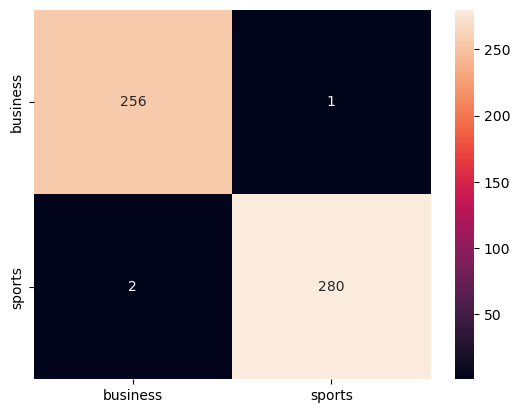

In [ ]:
# Train, Predict, Evaluate and confusion matri

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train
model = LogisticRegression(max_iter=500)
model.fit(X_train_vec, y_train)

# Predict
y_pred = model.predict(X_test_vec)

# Evaluate
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['business','sports'], yticklabels=['business','sports'])
plt.show()


In [ ]:
def predict_category(text, model=model, vectorizer=vectorizer):
    text_clean = clean_text(text)
    vec = vectorizer.transform([text_clean])
    pred = model.predict(vec)
    return pred[0]

example_text = "Pakistan wins gold in hockey championship"
print("Predicted category:", predict_category(example_text))


Predicted category: sports


In [24]:
# Train and Compare Two Models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Logistic Regression
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_vec, y_train)
y_pred_lr = log_reg.predict(X_test_vec)

# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
y_pred_nb = nb.predict(X_test_vec)

# Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

# Detailed Report
print("\nLogistic Regression Report:\n", classification_report(y_test, y_pred_lr))
print("\nNaive Bayes Report:\n", classification_report(y_test, y_pred_nb))


Logistic Regression Accuracy: 0.9944341372912802
Naive Bayes Accuracy: 0.9981447124304267

Logistic Regression Report:
               precision    recall  f1-score   support

    business       0.99      1.00      0.99       257
      sports       1.00      0.99      0.99       282

    accuracy                           0.99       539
   macro avg       0.99      0.99      0.99       539
weighted avg       0.99      0.99      0.99       539


Naive Bayes Report:
               precision    recall  f1-score   support

    business       1.00      1.00      1.00       257
      sports       1.00      1.00      1.00       282

    accuracy                           1.00       539
   macro avg       1.00      1.00      1.00       539
weighted avg       1.00      1.00      1.00       539



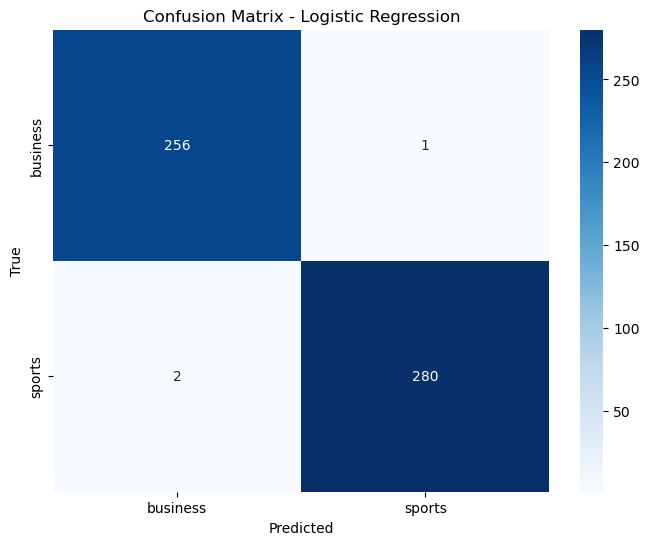

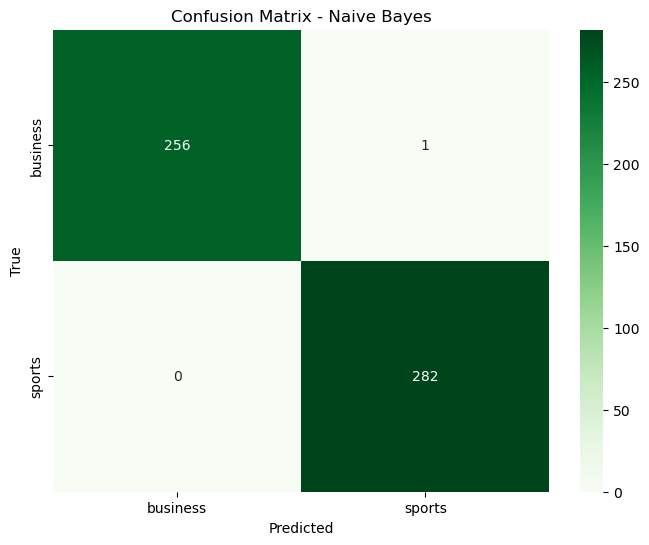

In [ ]:
# Confusion Matrices for Logistic Regression

cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8,6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=log_reg.classes_,
            yticklabels=log_reg.classes_)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Confusion matrix for Naive Bayes
cm_nb = confusion_matrix(y_test, y_pred_nb)

plt.figure(figsize=(8,6))
sns.heatmap(cm_nb, annot=True, fmt='d', cmap='Greens',
            xticklabels=nb.classes_,
            yticklabels=nb.classes_)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [28]:
import joblib

# Wrap Prediction in a Function

def predict_category(text, model, vectorizer):
    cleaned = clean_text(text) 
    vec = vectorizer.transform([cleaned])
    return model.predict(vec)[0]

# Example 
print(predict_category("Oil prices rise in global market", log_reg, vectorizer))
print(predict_category("Government announces new policy", nb, vectorizer))

joblib.dump(log_reg, "model.pkl")        # Logistic Regression chosen
joblib.dump(vectorizer, "vectorizer.pkl")

print("✅ Model and vectorizer saved as model.pkl and vectorizer.pkl")

business
business
✅ Model and vectorizer saved as model.pkl and vectorizer.pkl
